# **Hoja de Trabajo 2**

Paula Barillas - 22764
Mónica Salvatierra ' 22249

## **Link del Repositorio**

https://github.com/alee2602/HDT2-DM

### **Importar las librerías a utilizar**

In [1]:
import pandas as pd
#from pandas_profiling import ProfileReport   # para versiones Python < 3.11
from ydata_profiling import ProfileReport     # para versiones Python >= 3.11
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline


### **Leer archivo de datos**

In [3]:
data = pd.read_csv("iris.csv")

### **Obtener las primeros 10 observaciones**

In [5]:
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


### **Verificar el tipo de variables que estamos tratando**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


**A partir de esta información, podemos decir lo siguiente:**

- No existen valores faltantes
- Las 4 variables son numéricas, por lo que no necesitamos codificarlas ni estandarizar el nombre de nuestras columnas

### **Obtener estadísticas de las variables**

In [8]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Observamos que los valores no se encuentran muy dispersos, por lo que por el momento no consideramos necesario realizar una normalización de los datos,**

## **Sección 1**

**Visualizaremos los datos para verificar si se pueden distinguir algunos grupos**

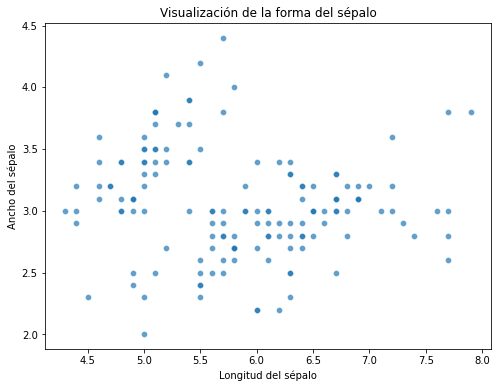

In [10]:
# Visualización de la forma del sépalo
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data["sepal_length"], y=data["sepal_width"], alpha=0.7)
plt.xlabel("Longitud del sépalo")
plt.ylabel("Ancho del sépalo")
plt.title("Visualización de la forma del sépalo")
plt.show()


**A continuación se crearán 2 clusters por medio del algoritmo de K-Means Clustering**

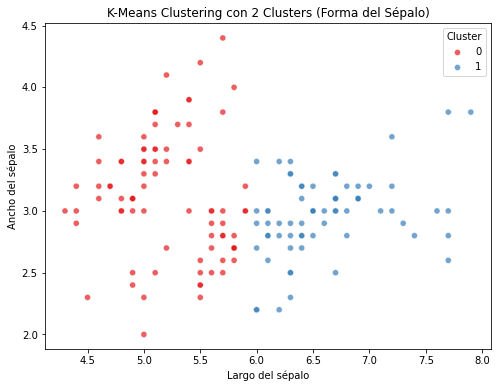

In [11]:
from sklearn.cluster import KMeans

# Aplicar K-Means con 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
data["cluster_2"] = kmeans.fit_predict(data[["sepal_length", "sepal_width"]])

# Graficar los resultados
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data["sepal_length"], y=data["sepal_width"], hue=data["cluster_2"], palette="Set1", alpha=0.7)
plt.xlabel("Largo del sépalo")
plt.ylabel("Ancho del sépalo")
plt.title("K-Means Clustering con 2 Clusters (Forma del Sépalo)")
plt.legend(title="Cluster")
plt.show()

**Mostrar la cantidad de observaciones en cada cluster**

In [14]:

contador_cluster = data["cluster_2"].value_counts().sort_index()

print("Cantidad de puntos en cada cluster:")
print(contador_cluster)


Cantidad de puntos en cada cluster:
cluster_2
0    83
1    67
Name: count, dtype: int64


**Estandarizaremos los datos para verificar si existe alguna diferencia en los clusters**

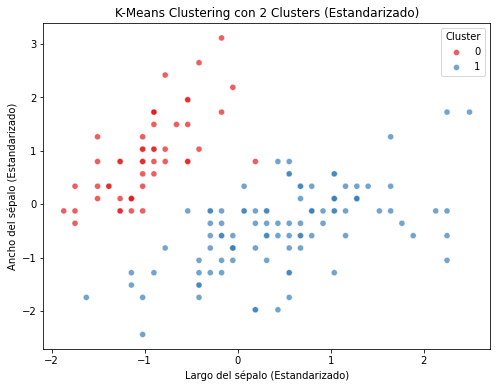

In [13]:
from sklearn.preprocessing import StandardScaler

# Estandarizar los datos
scaler = StandardScaler()
standarized_data = data.copy()
standarized_data[["sepal_length", "sepal_width"]] = scaler.fit_transform(data[["sepal_length", "sepal_width"]])

# Aplicar K-Means nuevamente con datos estandarizados
kmeans_std = KMeans(n_clusters=2, random_state=42, n_init=10)
standarized_data["cluster_2"] = kmeans_std.fit_predict(standarized_data[["sepal_length", "sepal_width"]])

# Graficar los resultados después de la estandarización
plt.figure(figsize=(8, 6))
sns.scatterplot(x=standarized_data["sepal_length"], y=standarized_data["sepal_width"], hue=standarized_data["cluster_2"], palette="Set1", alpha=0.7)
plt.xlabel("Largo del sépalo (Estandarizado)")
plt.ylabel("Ancho del sépalo (Estandarizado)")
plt.title("K-Means Clustering con 2 Clusters (Estandarizado)")
plt.legend(title="Cluster")
plt.show()


**Mostrar la cantidad de observaciones en cada cluster**

In [15]:
# Contar la cantidad de puntos en cada cluster después de la estandarización
cluster_counts_std = standarized_data["cluster_2"].value_counts().sort_index()

print("Cantidad de puntos en cada cluster después de la estandarización:")
print(cluster_counts_std)


Cantidad de puntos en cada cluster después de la estandarización:
cluster_2
0     50
1    100
Name: count, dtype: int64


Si existe una diferencia en la clasificación de las observaciones dentro de los clusters.